In [1]:
#Youth Tobacco Analysis

In [93]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
import seaborn as sns

In [94]:
df = pd.read_csv("Dataset.csv")
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [95]:
df

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,2002,KS,Kansas,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.3477403, -98.200781227)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10596,2015,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS09,9
10597,2010,WI,Wisconsin,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6
10598,2009,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [96]:
# Use info to provide a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [97]:
# Checks the number of unique and distinct values in dataframe
print(df.nunique())

YEAR                            19
LocationAbbr                    50
LocationDesc                    50
TopicType                        1
TopicDesc                        3
MeasureDesc                      4
DataSource                       2
Response                         3
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     750
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             111
Low_Confidence_Limit           688
High_Confidence_Limit          844
Sample_Size                   2625
Gender                           3
Race                             1
Age                              1
Education                        2
GeoLocation                     50
TopicTypeId                      1
TopicId                          3
MeasureId                        4
StratificationID1                3
StratificationID2                1
StratificationID3                1
StratificationID4   

In [98]:
# Checks statistical summary of dataframe
df.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [99]:
# Removes duplicate data

df.drop_duplicates(keep='first', inplace=True)

# There's no duplicate data after running df.info()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [101]:
df[df.isnull().all(axis=1)]

# There are no rows of missing values since the number of rows is zero

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder


In [102]:
# Average of smoking status 
print(df[['Data_Value','TopicDesc']].head())
TopicDesc_mean= df.groupby("TopicDesc")["Data_Value"].mean()
TopicDesc_mean

   Data_Value                      TopicDesc
0        32.2          Cigarette Use (Youth)
1        47.8          Cigarette Use (Youth)
2        12.7  Smokeless Tobacco Use (Youth)
3        28.5          Cigarette Use (Youth)
4        20.5  Smokeless Tobacco Use (Youth)


TopicDesc
Cessation (Youth)                53.634284
Cigarette Use (Youth)            17.985220
Smokeless Tobacco Use (Youth)     7.254902
Name: Data_Value, dtype: float64

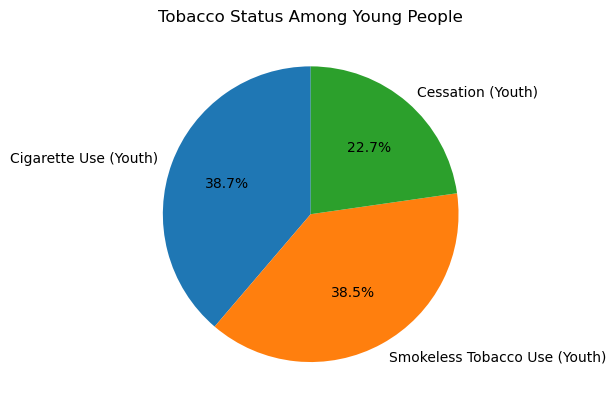

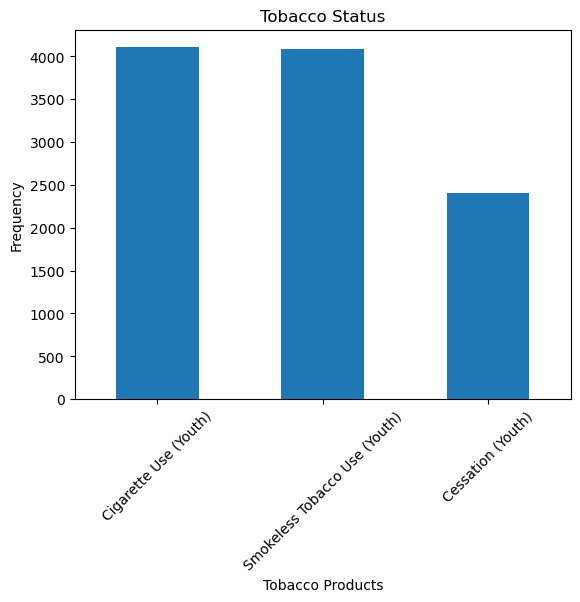

The most frequently used tobacco products amongst young people is Cigarettes


In [103]:
# What are the most frequently used tobacco products among young people?
# Smokeless Tobacco Products: Vapes,Hookahs,Nicotine Gums.

category_counts = df['TopicDesc'].value_counts()


plt.figure(figure=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Tobacco Status Among Young People")
plt.ylabel('')
plt.show()

plt.figure(figure=(8, 6))
category_counts.plot(kind='bar')
plt.title("Tobacco Status")
plt.ylabel('Frequency')
plt.xlabel('Tobacco Products')
plt.xticks(rotation=45)
plt.show()


print("The most frequently used tobacco products amongst young people is Cigarettes")

In [104]:
middle_school_df=df[df["Education"]=='Middle School']
middle_school_df
middle_school_df['Education']
middle_school_df['YEAR']==2002
year_plus_school_df=middle_school_df[middle_school_df["YEAR"]==2002]
year_plus_school_df
year_plus_school_df['LocationAbbr'].value_counts()



LocationAbbr
MN    24
WV    24
DE    24
VT    24
TN    24
MD    24
AL    24
PA    24
CT    24
IL    24
FL    24
NE    24
OH    24
KS    24
OK    24
MA    24
GU    24
NC    24
WI    24
IA    24
KY    21
NY    21
MS    21
US     1
Name: count, dtype: int64

In [105]:
year_check_df= df[df["YEAR"]==2002]
year_check_df
year_check_df["Education"]


12       Middle School
20         High School
29       Middle School
30       Middle School
37       Middle School
             ...      
10554      High School
10571    Middle School
10581      High School
10587    Middle School
10595    Middle School
Name: Education, Length: 1016, dtype: object

In [106]:
# Geographic: is there a correlation between state and reduced rates of youth tobacco usage?
columns_list = ['YEAR', 'TopicDesc', 'LocationDesc', 'Data_Value']
subset_df = df[columns_list]
subset_df

,YEAR,TopicDesc,LocationDesc,Data_Value
0,2004,Cigarette Use (Youth),Ohio,32.2
1,2008,Cigarette Use (Youth),Alabama,47.8
2,2015,Smokeless Tobacco Use (Youth),West Virginia,12.7
3,2005,Cigarette Use (Youth),Illinois,28.5
4,2005,Smokeless Tobacco Use (Youth),Connecticut,20.5
...,...,...,...,...
10595,2002,Smokeless Tobacco Use (Youth),Kansas,0.3
10596,2015,Cigarette Use (Youth),Illinois,2.7
10597,2010,Cessation (Youth),Wisconsin,NaN
10598,2009,Cigarette Use (Youth),Louisiana,10.1


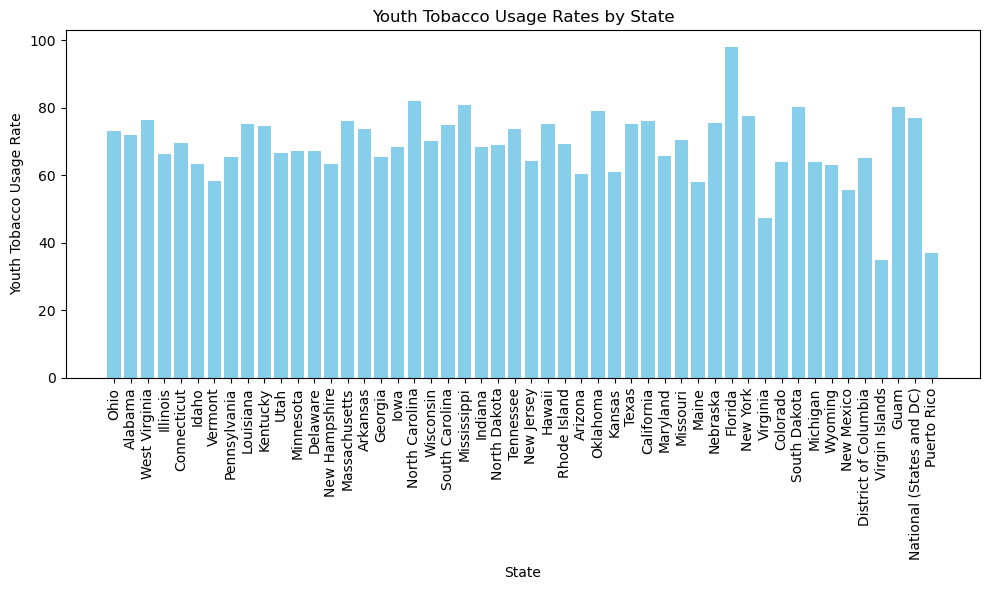

In [107]:
plt.figure(figsize=(10, 6))
plt.bar(subset_df['LocationDesc'], subset_df['Data_Value'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Youth Tobacco Usage Rate')
plt.title('Youth Tobacco Usage Rates by State')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()
plt.show()


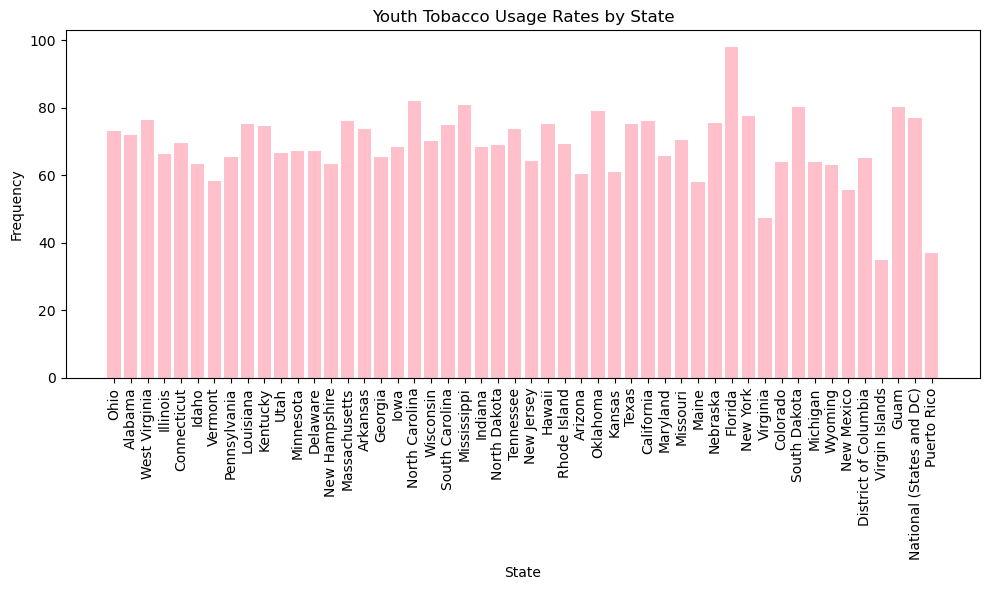

In [108]:
	plt.figure(figsize=(10, 6))
plt.bar(subset_df['LocationDesc'], subset_df['Data_Value'], color='pink')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Youth Tobacco Frequency by State')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()
plt.show()

/var/folders/l1/bbms4_2d4d11v5j0tx9k1w6m0000gn/T/ipykernel_66979/2725964610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Data_Value'] = pd.to_numeric(subset_df['Data_Value'], errors='coerce')


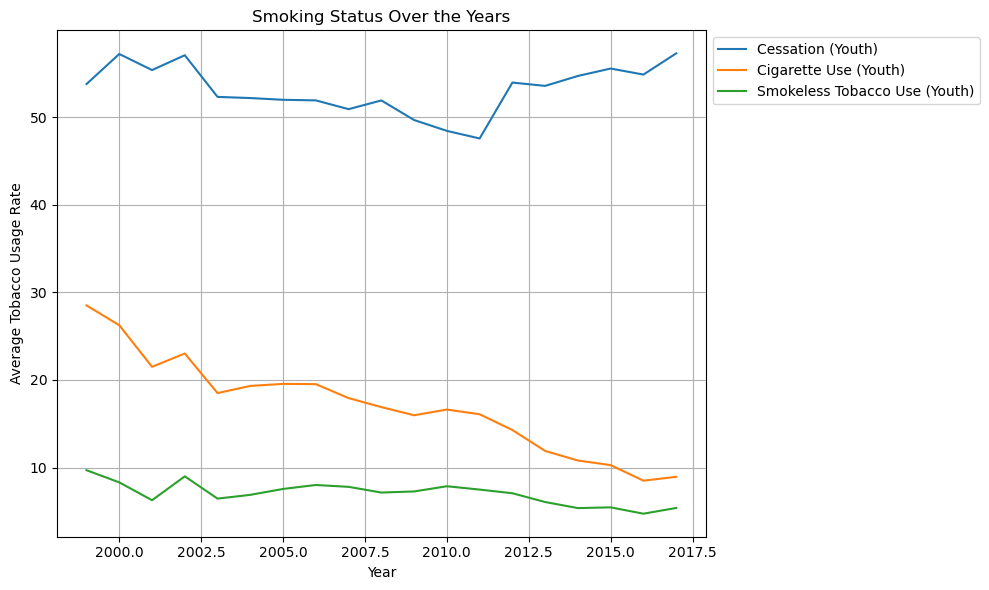

In [109]:
# Filter the columns you need
columns_list = ['YEAR', 'TopicDesc', 'Data_Value']
subset_df = df[columns_list]



# Convert 'Data_Value' to numeric (assuming it contains strings)
subset_df['Data_Value'] = pd.to_numeric(subset_df['Data_Value'], errors='coerce')

# Group data by year and state, calculate the mean usage rate
yearly_state_data = subset_df.groupby(['YEAR', 'TopicDesc']).mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
for state in yearly_state_data['TopicDesc'].unique():
    state_data = yearly_state_data[yearly_state_data['TopicDesc'] == state]
    plt.plot(state_data['YEAR'], state_data['Data_Value'], label=state)

plt.xlabel('Year')
plt.ylabel('Average Tobacco Usage Rate')
plt.title('Smoking Status Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/l1/bbms4_2d4d11v5j0tx9k1w6m0000gn/T/ipykernel_66979/3580459664.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Data_Value', data=df, ci=None)  # Set ci=None to remove error bars


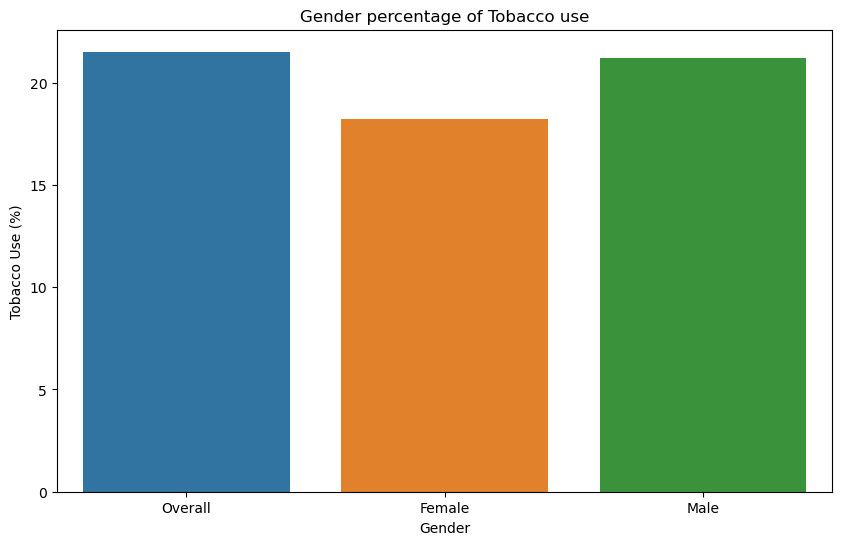

In [49]:
# What is the current measure of youth smoking status in the past based on educational level and gender?#

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Data_Value', data=df, ci=None)  # Set ci=None to remove error bars
plt.title('Gender percentage of Tobacco use')
plt.xlabel('Gender')
plt.ylabel('Tobacco Use (%)')

plt.show()

/var/folders/l1/bbms4_2d4d11v5j0tx9k1w6m0000gn/T/ipykernel_66979/2987660182.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Data_Value', data=df, ci=None)  # Set ci=None to remove error bars


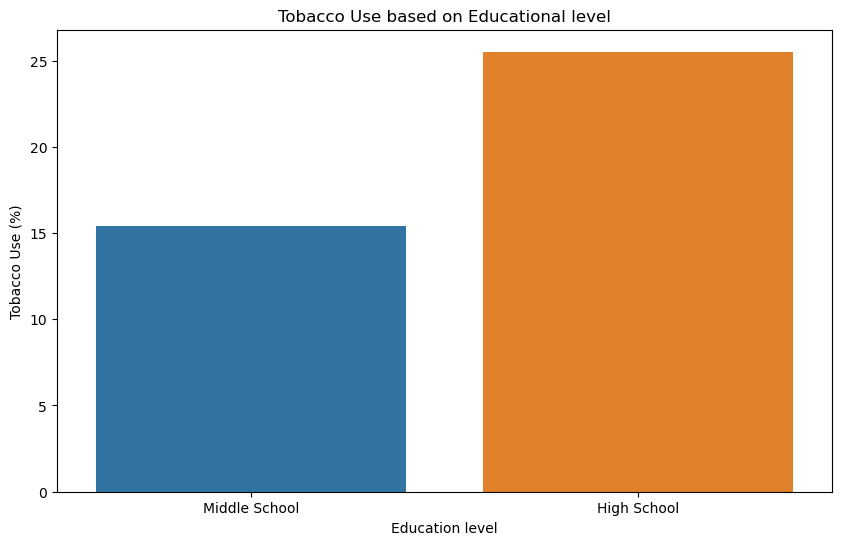

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Data_Value', data=df, ci=None)  # Set ci=None to remove error bars
plt.title('Tobacco Use based on Educational level')
plt.xlabel('Education level')
plt.ylabel('Tobacco Use (%)')

plt.show()